In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
sns.set()

In [4]:
5%2

1

## EDA on training file

In [7]:
train_data = pd.read_csv('../../data/serendipity-sac2018//training.csv')
# train_data = pd.read_csv('../Data/serendipity-sac2018/training.csv')

In [8]:
train_data.head()

,userId,movieId,rating,timestamp
0,142882,91658,2.5,1515209647000
1,142882,4344,1.0,1515209646000
2,142882,45720,2.0,1515209643000
3,142882,4734,2.0,1515209641000
4,142882,91542,2.0,1515209637000


In [9]:
print('The dataset train has {:,} rows and {:,} columns'.format(train_data.shape[0],train_data.shape[1]))

The dataset train has 9,997,850 rows and 4 columns


In [10]:
print('Number of unqiue userIDs are {:,} and number of movies are {:,}'.format(len(train_data['userId'].unique()),
                                                                     len(train_data['movieId'].unique())))

Number of unqiue userIDs are 104,661 and number of movies are 49,151


In [11]:
from datetime import datetime
train_data['timestamp'] = train_data['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))

In [12]:
train_data['year'] = train_data['timestamp'].apply(lambda x: x.year)
# train_data['month'] = train_data['timestamp'].apply(lambda x: x.month)

In [13]:
train_data['weekday'] = train_data['timestamp'].apply(lambda x: x.weekday())

In [ ]:
#train_data['weekday']

In [ ]:
train_data['year'].value_counts()

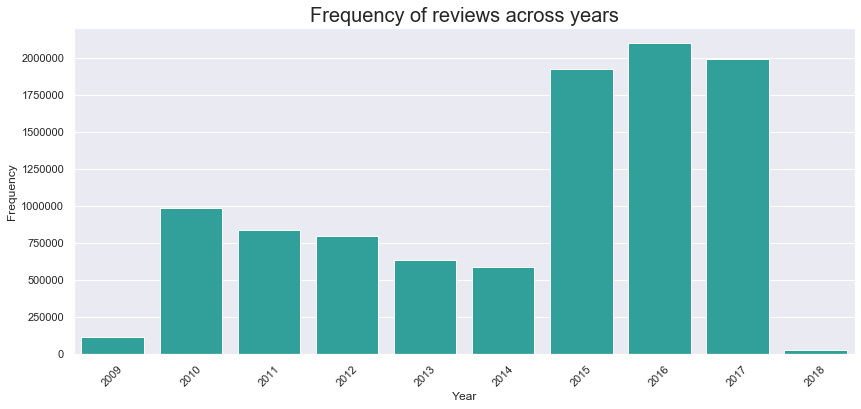

In [14]:
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(train_data['year'], color = 'lightseagreen')
plt.title('Frequency of reviews across years', fontdict= {'fontsize': 20})
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks( rotation = 45)
plt.show()

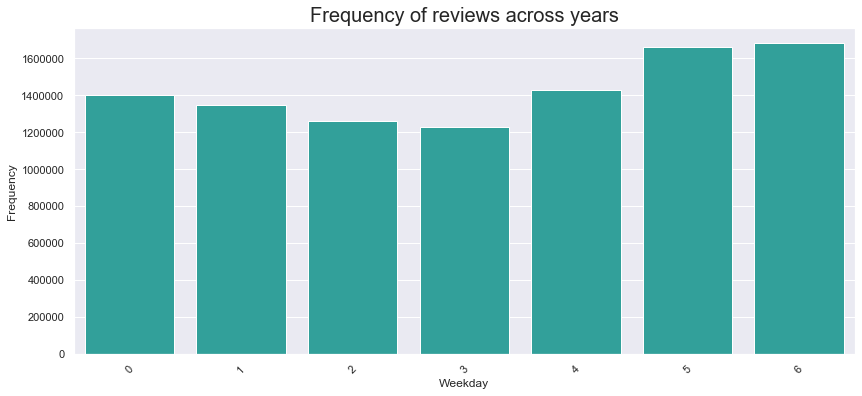

In [15]:
#week_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(train_data['weekday'], color = 'lightseagreen')
plt.title('Frequency of reviews across years', fontdict= {'fontsize': 20})
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
# plt.xticks(labels = week_labels)
plt.show()

In [ ]:
# Movie with maximum review
train_data['movieId'].value_counts().head(20)

**Creating a user movie matrix**

In [ ]:
UM_matrix = train_data.pivot(index='userId', columns='movieId', values='rating')

In [ ]:
# total_nas = UM_matrix.isna().sum().sum()

In [ ]:
nas_per_movie = UM_matrix.isna().sum(axis = 0)
nas_per_user = UM_matrix.isna().sum(axis = 1)

In [ ]:
print('{:,} which is {}% NAs'.format(total_nas,round(total_nas/(len(nas_per_user)*len(nas_per_movie)),4)) )

In [ ]:
nas_per_movie*100/len(nas_per_user)

In [ ]:
nas_per_user*100/ len(nas_per_movie)

## EDA on tags file

In [ ]:
tags_data = pd.read_csv('../../data/serendipity-sac2018//tags.csv')

In [ ]:
tags_data.head()

In [ ]:
tags_data.shape

In [ ]:
print('Number of unqiue userIDs are {:,} and number of movies are {:,}'.format(len(tags_data['userId'].unique()),
                                                                     len(tags_data['movieId'].unique())))

In [ ]:
print('We have {:,} tags only for {}% of the total movies'.format(len(tags_data['movieId'].unique()),
                    round(len(tags_data['movieId'].unique())*100/len(train_data['movieId'].unique()),4)))

In [ ]:
len(tags_data['tag'].unique())

In [ ]:
tags_data['tag'].value_counts().head(20)

In [ ]:
tags_data['movieId'].value_counts().head(20)

## EDA on movies file

In [ ]:
movies = pd.read_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//movies.csv')

In [ ]:
movies.columns

In [ ]:
movies.head()

In [ ]:
print('The dataset movies has {:,} rows and {:,} columns'.format(movies.shape[0],movies.shape[1]))

In [ ]:
movies['genres_cleaned'] = movies.iloc[:,7:-1].fillna('').apply(lambda x: x.str.cat(sep=';'), axis=1)

In [ ]:
movies['genres_cleaned'] = movies['genres_cleaned'].apply(lambda x: set(x.split(';')) - set({''}))

In [ ]:
movies_cleaned = movies[movies.columns[movies.columns.str.contains('Unnamed') != True]]

In [ ]:
movies_cleaned.head()

In [ ]:
movies_cleaned = movies_cleaned.drop(columns= 'genres')

In [ ]:
movies_cleaned.to_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//movies_cleaned.csv')

------
Ignoring the 8 rows with bad formatting

In [11]:
movies = pd.read_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//moviesv2.csv',
                             error_bad_lines=False)

b'Skipping line 19833: expected 8 fields, saw 10\nSkipping line 34143: expected 8 fields, saw 9\nSkipping line 36015: expected 8 fields, saw 10\nSkipping line 37260: expected 8 fields, saw 12\nSkipping line 44379: expected 8 fields, saw 10\nSkipping line 47551: expected 8 fields, saw 10\n'


In [12]:
movies.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres
0,1,Toy Story (1995),1995-11-19,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",114709,862.0,"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),1995-12-15,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",113497,8844.0,"Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),1995-01-01,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",113228,15602.0,"Comedy,Romance"
3,4,Waiting to Exhale (1995),1996-01-15,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",114885,31357.0,"Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),1995-12-08,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",113041,11862.0,Comedy


In [13]:
print('Number of unique movies {:,}'.format(len(movies['movieId'].unique())))
print('{} of the movies are not present in the train data'.format(
    len(set(movies['movieId'].unique()) - set(train_data['movieId'].unique()))))

Number of unique movies 49,168
23 of the movies are not present in the train data


In [14]:
movies['genres'].value_counts().head(10)*100/len(movies)

Drama                   14.533843
Comedy                   8.989587
Documentary              7.350309
Comedy,Drama             3.486007
Drama,Romance            3.136186
Horror                   2.471119
Comedy,Romance           2.263667
Comedy,Drama,Romance     1.541653
Thriller                 1.328100
Crime,Drama              1.293524
Name: genres, dtype: float64

In [15]:
movies['genres'].value_counts()[movies['genres'].value_counts() == 1].head()

Action,Fantasy,Horror,Mystery,Sci-Fi,Thriller    1
Action,Fantasy,War,IMAX                          1
Sci-Fi,Fantasy,Comedy                            1
Drama,Western,Romance                            1
Mystery,Comedy,Crime                             1
Name: genres, dtype: int64

In [16]:
print('Number of director who have directed a single movie {:,} from {:,} total directors'.format(
    sum(movies['directedBy'].value_counts()== 1), len(movies['directedBy'].unique())))

Number of director who have directed a single movie 13,014 from 20,284 total directors


---

## EDA on Answers.csv

In [ ]:
# answers = pd.read_csv("../../Data/serendipity-sac2018/answers.csv")
answers = pd.read_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//answers.csv')

In [ ]:
answers.head()

In [ ]:
answers['timestamp'] = answers['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
answers['year'] = answers['timestamp'].apply(lambda x: x.year)
answers['month'] = answers['timestamp'].apply(lambda x: x.month)
answers['weekday'] = answers['timestamp'].apply(lambda x: x.weekday())

In [ ]:
print('The dataset train has {:,} rows and {:,} columns'.format(answers.shape[0],answers.shape[1]))
print('Number of unqiue userIDs are {:,} and number of movies are {:,}'.format(len(answers['userId'].unique()),
                                                                     len(answers['movieId'].unique())))

In [ ]:
answers.rating.describe()

**Serendipity ratings are given for movies that were rated highly by users. Could be an issue.**

In [ ]:
plt.rcParams['figure.figsize'] = (14, 6)
# sns.countplot(answers['rating'], color = 'lightseagreen')
sns.distplot(answers[answers['predictedRating'].isna() == False]['predictedRating'], color = 'black')
plt.title('Distribution of predicted ratings', fontdict= {'fontsize': 20})
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.xticks( rotation = 45)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(answers['rating'], color = 'lightseagreen',)
plt.title('Distribution of movie ratings', fontdict= {'fontsize': 20})
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks( rotation = 45)
plt.show()

In [ ]:
# plt.rcParams['figure.figsize'] = (14, 6)
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
sns.countplot(answers['rating'], color = 'lightseagreen', ax=ax)
ax.set_ylabel("Frequency of true ratings")
ax.patch.set_alpha(0)
ax2 = ax.twinx()
sns.distplot(answers[answers['predictedRating'].isna() == False]['predictedRating'], 
             color = 'black',ax=ax2,hist_kws={"alpha": 0.3})
ax2.set_ylabel("Distribution of predicted rating")
act_patch = mpatches.Patch(color='lightseagreen', label='Actual Movie Ratings')
pred_patch = mpatches.Patch(color='black', label='Predicted Ratings')
plt.legend(handles=[act_patch,pred_patch])
plt.show()



In [ ]:
serendipity_cols = ["s"+str(i) for i in range(1,9)]

sns.countplot(x="variable", hue="value", data=pd.melt(answers[serendipity_cols]))
plt.xlabel('Serendipity Question Rating')
plt.show()

In [ ]:
sns.countplot(answers['q'], color = 'lightseagreen')
plt.title('When did you watch the movie for the first time?')
plt.xticks([i for i in range(7)],
           ['past week', 'past month', '1-6 months', '6-12 months', '1-3 years', '>3 years ago', 'don\'t remember'])
plt.show()

In [ ]:
serendipity_cols = ['s_ser_rel', 's_ser_find', 's_ser_imp', 's_ser_rec']

sns.countplot(x="variable", hue="value", data=pd.melt(answers[serendipity_cols]))
plt.title('Strict serendipity')
plt.show()

In [ ]:
serendipity_cols = ['m_ser_rel', 'm_ser_find', 'm_ser_imp', 'm_ser_rec']

sns.countplot(x="variable", hue="value", data=pd.melt(answers[serendipity_cols]))
plt.title('Motivational serendipity')
plt.show()

---
**Filtering the data by year <br>
Considering years {2016, 2017 and 2018}**

In [17]:
print('The data will reduce by {} % if we filter for only years 16,17&18'.format(
    round(len(train_data[train_data['year'] <= 2015])*100/len(train_data),3)))

The data will reduce by 58.815 % if we filter for only years 16,17&18


In [18]:
train_filtered = train_data[train_data['year'] > 2015]

In [19]:
print('The filtered data has {:,} rows'.format(train_filtered.shape[0]))

The filtered data has 4,117,647 rows


---
Merging the filtered train data with movies data

In [20]:
train_filtered_movies = train_filtered.merge(movies,how ='left',on = 'movieId')

In [21]:
assert train_filtered_movies.shape[0] == train_filtered.shape[0]
assert train_filtered_movies.shape[1] == train_filtered.shape[1] + movies.shape[1] -1

In [22]:
train_filtered_movies.head()

,userId,movieId,rating,timestamp,year,month,weekday,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres
0,142882,91658,2.5,2018-01-05 21:34:07,2018,1,4,"Girl with the Dragon Tattoo, The (2011)",2011-12-21,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1568346.0,65754.0,"Drama,Thriller"
1,142882,4344,1.0,2018-01-05 21:34:06,2018,1,4,Swordfish (2001),2001-06-08,Dominic Sena,"Hugh Jackman, John Travolta, Halle Berry, Don ...",244244.0,9705.0,"Action,Crime,Drama"
2,142882,45720,2.0,2018-01-05 21:34:03,2018,1,4,"Devil Wears Prada, The (2006)",2006-06-30,David Frankel,"Anne Hathaway, Meryl Streep, Adrian Grenier, S...",458352.0,350.0,"Comedy,Drama"
3,142882,4734,2.0,2018-01-05 21:34:01,2018,1,4,Jay and Silent Bob Strike Back (2001),2001-08-24,Kevin Smith,"Jason Mewes, Kevin Smith, Ben Affleck, Jeff An...",261392.0,2294.0,"Adventure,Comedy"
4,142882,91542,2.0,2018-01-05 21:33:57,2018,1,4,Sherlock Holmes: A Game of Shadows (2011),2011-12-16,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, N...",1515091.0,58574.0,"Action,Adventure,Comedy,Crime,Mystery,Thriller"


In [23]:
train_filtered_movies['genres'].value_counts().head(5)

Drama                      257860
Comedy                     196179
Comedy,Romance             113863
Action,Adventure,Sci-Fi    111120
Drama,Romance              102561
Name: genres, dtype: int64

In [24]:
train_filtered_movies['title'].value_counts().head(15)*100/len(train_filtered_movies)

Shawshank Redemption, The (1994)                             0.412906
Matrix, The (1999)                                           0.410769
Inception (2010)                                             0.371960
Fight Club (1999)                                            0.348160
Lord of the Rings: The Return of the King, The (2003)        0.336746
Forrest Gump (1994)                                          0.330941
Dark Knight, The (2008)                                      0.318070
Star Wars: Episode IV - A New Hope (1977)                    0.312071
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.310736
Lord of the Rings: The Two Towers, The (2002)                0.294440
The Martian (2015)                                           0.286280
Pulp Fiction (1994)                                          0.277124
Deadpool (2016)                                              0.269426
Interstellar (2014)                                          0.268284
Star Wars: Episode V

In [25]:
train_filtered_movies['genres'] = train_filtered_movies['genres'].apply(lambda x: str(x).split(','))

In [28]:
train_filtered_movies.head()

,userId,movieId,rating,timestamp,year,month,weekday,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres
0,142882,91658,2.5,2018-01-05 21:34:07,2018,1,4,"Girl with the Dragon Tattoo, The (2011)",2011-12-21,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1568346.0,65754.0,"[Drama, Thriller]"
1,142882,4344,1.0,2018-01-05 21:34:06,2018,1,4,Swordfish (2001),2001-06-08,Dominic Sena,"Hugh Jackman, John Travolta, Halle Berry, Don ...",244244.0,9705.0,"[Action, Crime, Drama]"
2,142882,45720,2.0,2018-01-05 21:34:03,2018,1,4,"Devil Wears Prada, The (2006)",2006-06-30,David Frankel,"Anne Hathaway, Meryl Streep, Adrian Grenier, S...",458352.0,350.0,"[Comedy, Drama]"
3,142882,4734,2.0,2018-01-05 21:34:01,2018,1,4,Jay and Silent Bob Strike Back (2001),2001-08-24,Kevin Smith,"Jason Mewes, Kevin Smith, Ben Affleck, Jeff An...",261392.0,2294.0,"[Adventure, Comedy]"
4,142882,91542,2.0,2018-01-05 21:33:57,2018,1,4,Sherlock Holmes: A Game of Shadows (2011),2011-12-16,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, N...",1515091.0,58574.0,"[Action, Adventure, Comedy, Crime, Mystery, Th..."


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(train_filtered_movies['genres'])

In [29]:
train_filtered_movies = train_filtered_movies.join(pd.DataFrame(X, columns=mlb.classes_))

In [ ]:
train_filtered_movies.head()

In [30]:
train_filtered_movies.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'year', 'month', 'weekday',
       'title', 'releaseDate', 'directedBy', 'starring', 'imdbId', 'tmdbId',
       'genres', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'nan'],
      dtype='object')

In [31]:
train_filtered_movies[['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',]].sum()*100/len(train_filtered_movies)

Action         34.452662
Adventure      27.248353
Animation       8.943093
Children        8.932504
Comedy         32.068169
Crime          17.041310
Documentary     1.393441
Drama          42.376653
Fantasy        13.559467
Film-Noir       0.698093
Horror          7.840594
IMAX            8.890247
Musical         2.775663
Mystery         8.512313
Romance        15.104160
Sci-Fi         21.399867
Thriller       27.886363
War             4.756624
Western         1.464307
dtype: float64

In [32]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

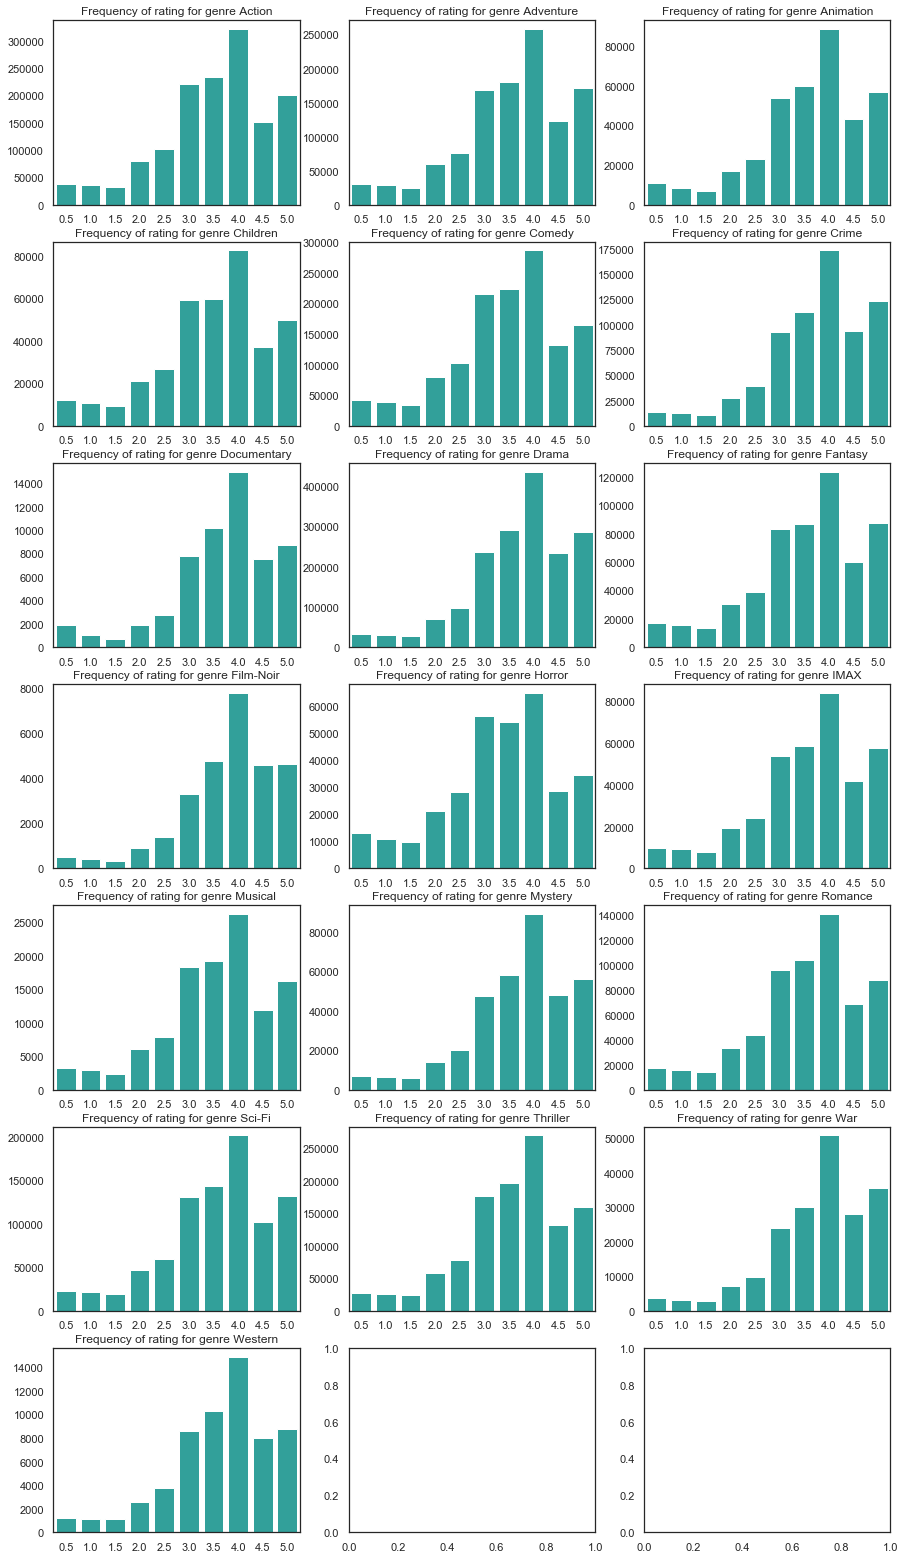

In [50]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(7, 3, figsize=(15, 10))
for i,genre in enumerate(genres):
    # print(i//3,i%3)
    # plt.subplot(4,5,i+1)
    sns.countplot(train_filtered_movies[train_filtered_movies[genre] == 1]['rating'], 
                  color = 'lightseagreen',ax=axes[i//3,i%3]).set(
        title = 'Frequency of rating for genre {}'.format(genre), xlabel = '', ylabel = '')
    
    # ax.set_ylabel('Frequency')
    # plt.title('Frequency of rating for genre {}'.format(genre))
    # plt.ylabel('Frequency')
    # plt.xticks(labels = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
    # plt.xticks( rotation = 45)
    # plt.show()
    
    
    plt.subplots_adjust(bottom = 0.1 , top = 2.2)
    
    # print(train_filtered_movies[train_filtered_movies[genre] == 1]['rating'].value_counts(sort = False ).sort_index(
    # )*100/len(train_filtered_movies[train_filtered_movies[genre] == 1]['rating']))


In [ ]:
train_filtered_movies.head()

In [51]:
train_filtered_movies.to_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//train_filtered_movies.csv')

In [ ]:
UM_matrix = train_filtered_movies.pivot(index='userId', columns='movieId', values='rating')

----

In [34]:
movies['genres'] = movies['genres'].apply(lambda x: str(x).split(','))

In [35]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(movies['genres'])
movies = movies.join(pd.DataFrame(X, columns=mlb.classes_))

In [36]:
movies.columns

Index(['movieId', 'title', 'releaseDate', 'directedBy', 'starring', 'imdbId',
       'tmdbId', 'genres', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'nan'],
      dtype='object')

In [37]:
movies_genre = movies[['movieId', 'title','Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']]

In [38]:
movies_genre.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
